In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import sys
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow as tf
from sklearn import utils
from sklearn.model_selection import train_test_split
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing import *
from tensorflow.keras.callbacks import EarlyStopping

print(tf.__version__)


from google.colab import drive
drive.mount('/content/drive')

os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/Binarios'
%cd '/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/Binarios'

2.11.0
Mounted at /content/drive
/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/Binarios


In [2]:
X_train= np.load("/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/Binarios/x_train.npy")
X_test= np.load("/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/Binarios/x_test.npy")
y_train= np.load("/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/Binarios/y_train.npy")
y_test= np.load("/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/Binarios/y_test.npy")

print(np.shape(X_train),np.shape(X_test),np.shape(y_train),np.shape(y_test))

(20710, 32, 32, 3) (8876, 32, 32, 3) (20710, 2) (8876, 2)


In [3]:
model_CNN2 =  tf.keras.applications.ResNet50(input_shape=(32,32,3), weights='imagenet', include_top=False)
model_CNN2.trainable = False
model_CNN2.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                          

In [4]:
model_CNN2.trainable = False #congelado todo
print("Total layers of ResNet50: ", len(model_CNN2.layers))
for layer in model_CNN2.layers[-50:]: 
  layer.trainable =  True #Descongelando las ultimas 50
print("Total layers of ResNet50: ", len(model_CNN2.layers))


Total layers of ResNet50:  175
Total layers of ResNet50:  175


In [5]:
n1 = tf.keras.layers.Dense(64, activation='relu')
n2 = tf.keras.layers.Dense(8, activation='relu')
p = tf.keras.layers.Dense(2, activation='softmax')
#f = tf.keras.layers.Flatten()
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

model_CNN = tf.keras.Sequential([
  model_CNN2,  
  global_average_layer, 
  n1,
  n2, 
  p
])

#model_CNN.summary()
#print("number of layers to train: ", len(model_CNN.trainable_variables))

In [6]:
#import matplotlib.pyplot as plt

early_stopping = EarlyStopping(patience=5, restore_best_weights = True)
learning_rate= 0.001
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model_CNN.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])


In [7]:
history = model_CNN.fit(X_train, y_train, epochs=50,verbose=1, batch_size=64,validation_data=(X_test, y_test))


Epoch 1/50
324/324 [==============================] - 22s 29ms/step - loss: 0.3883 - accuracy: 0.8999 - val_loss: 0.3001 - val_accuracy: 0.9042
Epoch 2/50
324/324 [==============================] - 7s 22ms/step - loss: 0.2745 - accuracy: 0.9103 - val_loss: 0.2937 - val_accuracy: 0.9028
Epoch 3/50
324/324 [==============================] - 8s 24ms/step - loss: 0.2558 - accuracy: 0.9106 - val_loss: 0.2785 - val_accuracy: 0.9029
Epoch 4/50
324/324 [==============================] - 7s 23ms/step - loss: 0.2452 - accuracy: 0.9112 - val_loss: 0.3122 - val_accuracy: 0.9038
Epoch 5/50
324/324 [==============================] - 6s 20ms/step - loss: 0.2356 - accuracy: 0.9135 - val_loss: 0.2808 - val_accuracy: 0.9051
Epoch 6/50
324/324 [==============================] - 6s 20ms/step - loss: 0.2321 - accuracy: 0.9149 - val_loss: 0.2775 - val_accuracy: 0.9039
Epoch 7/50
324/324 [==============================] - 6s 20ms/step - loss: 0.2246 - accuracy: 0.9182 - val_loss: 0.2820 - val_accuracy: 0.904

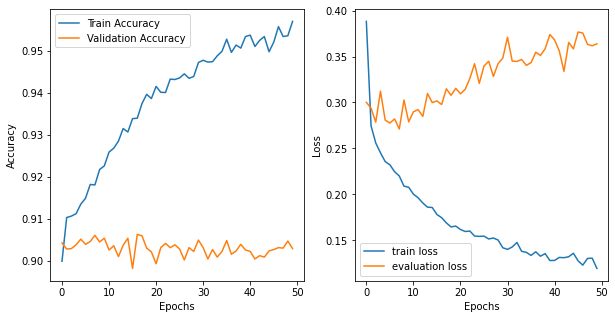

In [8]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [9]:

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape(32, 32,3), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/Binarios
278/278 [==============================] - 5s 11ms/step
valor predicho: 1  clase:  SR
max prob:  0.987889 ground truth:  NR
(8876, 2)


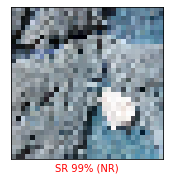

In [10]:
#@title **code:**  Evaluate results
%cd '/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/Binarios'

import matplotlib.pyplot as plt
class_names = ['NR','SR']
#%run code/dl_plot.py
index_vector =  36#@param {type:"integer"}

predictions = model_CNN.predict(X_test)
print ("valor predicho:",  np.argmax(predictions[index_vector]), " clase: ", class_names[np.argmax(predictions[index_vector])])
print ("max prob: ", np.max(predictions[index_vector]), "ground truth: ", class_names[np.argmax(y_test ,axis=1)[index_vector]])

print(predictions.shape)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index_vector, predictions, np.argmax(y_test ,axis=1), X_test)
#plt.subplot(1,2,2)
#plot_value_array(index_vector, predictions,  np.argmax(Y_test ,axis=1))

In [11]:
#@title **code:**  Ahora compilo creando mi propia matriz de costos y usandola en una función de pérdida cost sensitive personalizada


def cost_sensitive_loss(y_true, y_pred, cost_matrix):
    # Convertir la matriz de costos en un tensor constante
    cost_matrix = tf.constant(cost_matrix)

    # Obtener las etiquetas verdaderas y las etiquetas predecidas
    y_true = tf.argmax(y_true, axis=-1)
    y_pred = tf.argmax(y_pred, axis=-1)

    # Calcular la pérdida cost-sensitive como la media de la matriz de costos 
    # en las posiciones correspondientes a la etiqueta verdadera y la etiqueta predecida
    loss = tf.reduce_mean(tf.gather_nd(cost_matrix, tf.stack((y_true, y_pred), axis=-1)))

    return loss

# Crear un modelo de TensorFlow


# Compilar el modelo con la función de costo cost-sensitive
matriz_costos = np.array([[0, 1], [500, 0]])
model_CNN.compile(optimizer='adam', loss=lambda y_true, y_pred: cost_sensitive_loss(y_true, y_pred, matriz_costos), metrics=['accuracy'])


In [12]:
matriz_costos = np.array([[0, 1], [500, 0]])

In [14]:

history = model_CNN.fit(X_train, y_train, epochs=10,verbose=1, batch_size=64, validation_data=(X_test, y_test))



Epoch 1/10


ValueError: ignored

In [ ]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(32,32,3), cmap=plt.cm.binary)

    plt.xlabel(class_names[int(y_test[i,1])])